In [ ]:
%%capture
!pip install MiniSom

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance
from IPython.display import HTML

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, balanced_accuracy_score, precision_recall_curve, average_precision_score, fbeta_score, make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

np.random.seed(42)

In [ ]:
column_names = [
    'Status of existing checking account', 'Duration in month', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since',
    'Installment rate in percentage of disposable income', 'Personal status and sex',
    'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years',
    'Other installment plans', 'Housing', 'Number of existing credits at this bank',
    'Job', 'Number of people being liable to provide maintenance for', 'Telephone',
    'foreign worker', 'Good/Bad'
]

df = pd.read_csv('german.data', delim_whitespace=True, header=None, names=column_names)
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# inicio

In [ ]:
df2 = df.copy()
df2

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
#X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_columns = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds',
                        'Present employment since', 'Personal status and sex', 'Other debtors / guarantors',
                        'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker']

encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")

encoder.fit(X[categorical_columns])

X_encoded2 = encoder.transform(X[categorical_columns])
X_encoded2

,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose_A41,Purpose_A410,Purpose_A42,...,Property_A124,Other installment plans_A142,Other installment plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,foreign worker_A202
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
numerical_columns = ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since',
                     'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for']


scaler = StandardScaler()

X_train_scaled2 = X_encoded2.copy()
X_train_scaled2[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [ ]:
X2 = X_train_scaled2.copy()
X2

,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose_A41,Purpose_A410,Purpose_A42,...,Job_A174,Telephone_A192,foreign worker_A202,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290
997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290


Explained variation per principal component: [0.14526337 0.13046191 0.09390457 0.08510201 0.07698513 0.06184914
 0.03268816 0.02948506 0.02615851 0.02551013]


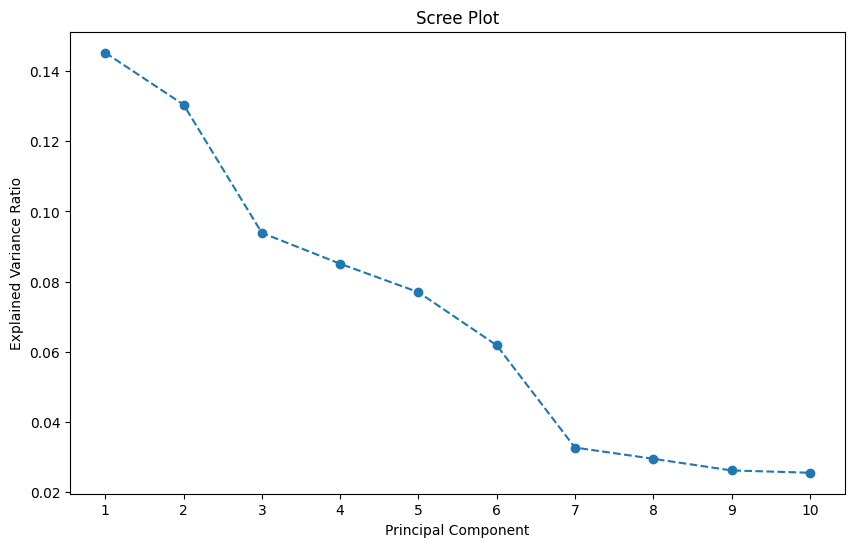

In [ ]:
pca = PCA(n_components=10)
X2_pca = pca.fit_transform(X2)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()

In [ ]:
desired_variance = 0.75

pca = PCA()
X2_pca = pca.fit_transform(X2)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

pca = PCA(n_components=n_components)
X2_pca = pca.fit_transform(X2)

print(f'Number of components needed to explain {desired_variance*100}% variance: {n_components}')
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Number of components needed to explain 75.0% variance: 12
Explained variation per principal component: [0.14526337 0.13046191 0.09390457 0.08510201 0.07698513 0.06184914
 0.03268816 0.02948506 0.02615851 0.02551013 0.02427118 0.02277155]


In [ ]:
labels = pd.DataFrame(columns = ['k-means', 'Agglomerative', 'Isolation Forest', 'DBSCAN','SOM_cluster', 'LOF', 'OneClassSVM', 'Mahalanobis'])

labels = labels.reindex(X2.index)

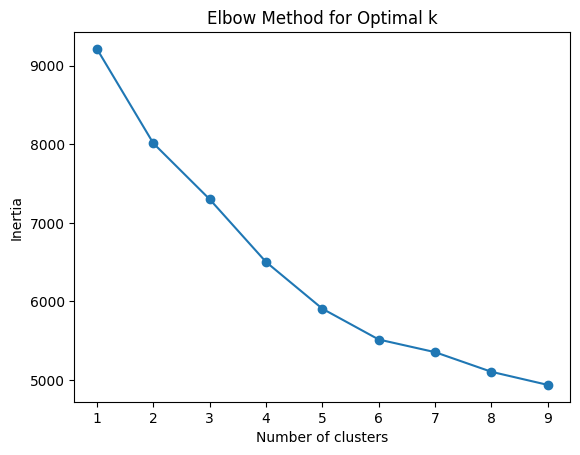

In [ ]:
inertia = []
for num_clusters in list(range(1, 10)):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X2_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
y = y.apply(lambda x: 1 if x == 2 else 0)

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X2_pca)
clusters = np.where(clusters == 0, 1, 0)

labels['k-means'] = clusters

In [ ]:
f2_scores = fbeta_score(y, labels['k-means'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y, labels['k-means'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['k-means'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y, labels['k-means'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y, labels['k-means'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['k-means'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_kmeans = f2_scores[1]

F2 Score:
Class Good (0): 0.23
Class Bad (1): 0.5
Macro avg: 0.36
Weighted avg: 0.31
Rate:  0.4
Confusion Matrix:
 [[196 104]
 [563 137]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.57      0.20      0.29       700
     Bad (1)       0.26      0.65      0.37       300

    accuracy                           0.33      1000
   macro avg       0.41      0.42      0.33      1000
weighted avg       0.48      0.33      0.31      1000

Balanced Accuracy: 0.42


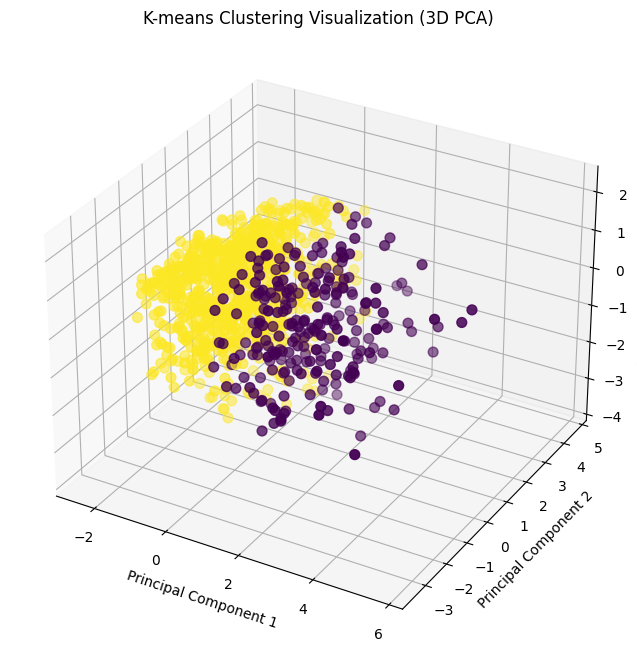

In [ ]:
pca = PCA(n_components=3)
X2_pca_3d = pca.fit_transform(X2_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2_pca_3d[:, 0], X2_pca_3d[:, 1], X2_pca_3d[:, 2], c=clusters, cmap='viridis', s=50)

ax.set_title('K-means Clustering Visualization (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:
model = IsolationForest(contamination=0.5, random_state=42)

model.fit(X2_pca)
predictions = model.predict(X2_pca)

predictions = np.where(predictions == -1, 1, 0)

labels['Isolation Forest'] = predictions

In [ ]:
f2_scores = fbeta_score(y, labels['Isolation Forest'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y, labels['Isolation Forest'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['Isolation Forest'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y, labels['Isolation Forest'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y, labels['Isolation Forest'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['Isolation Forest'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_is = f2_scores[1]

F2 Score:
Class Good (0): 0.54
Class Bad (1): 0.47
Macro avg: 0.51
Weighted avg: 0.52
Rate:  0.49
Confusion Matrix:
 [[159 141]
 [341 359]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.72      0.51      0.60       700
     Bad (1)       0.32      0.53      0.40       300

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.60      0.52      0.54      1000

Balanced Accuracy: 0.52


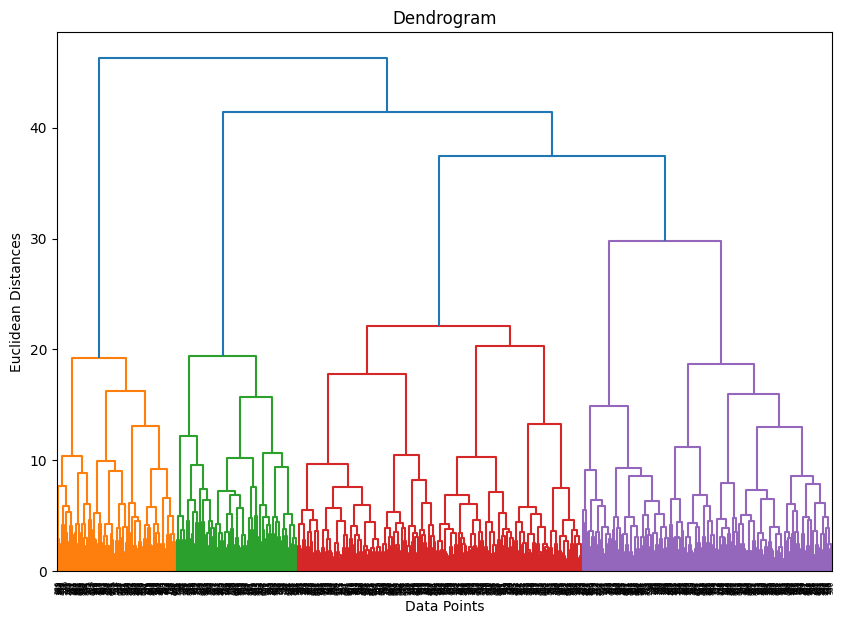

In [ ]:
hc = AgglomerativeClustering(n_clusters=2,
                            metric='cosine',
                            linkage='single',
                             distance_threshold=None)
y_hc = hc.fit_predict(X2_pca)
y_hc = np.where(y_hc == 0, 1, 0)

labels['Agglomerative'] = y_hc

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X2_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
f2_scores = fbeta_score(y, labels['Agglomerative'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y, labels['Agglomerative'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['Agglomerative'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y, labels['Agglomerative'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y, labels['Agglomerative'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['Agglomerative'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_agg = f2_scores[1]

F2 Score:
Class Good (0): 0.0
Class Bad (1): 0.68
Macro avg: 0.34
Weighted avg: 0.21
Rate:  0.44
Confusion Matrix:
 [[300   0]
 [699   1]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       1.00      0.00      0.00       700
     Bad (1)       0.30      1.00      0.46       300

    accuracy                           0.30      1000
   macro avg       0.65      0.50      0.23      1000
weighted avg       0.79      0.30      0.14      1000

Balanced Accuracy: 0.50


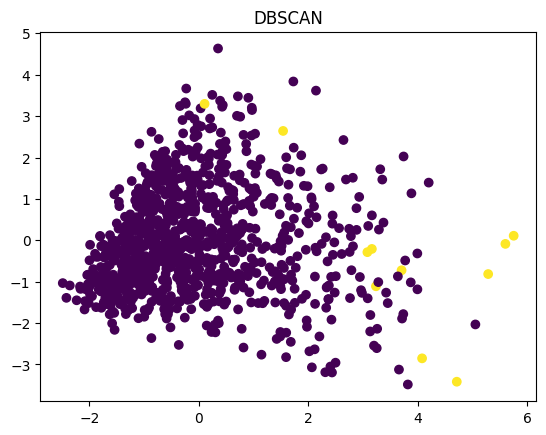

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=24)
y_dbscan = dbscan.fit_predict(X2_pca)
y_dbscan = np.where(y_dbscan == -1, 1, 0)

labels['DBSCAN'] = y_dbscan

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN')
plt.show()

In [ ]:
f2_scores = fbeta_score(y, labels['DBSCAN'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y, labels['DBSCAN'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y, labels['DBSCAN'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['DBSCAN'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y, labels['DBSCAN'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['DBSCAN'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_dbscan = f2_scores[1]

F2 Score:
Class Good (0): 0.92
Class Bad (1): 0.02
Confusion Matrix:
 [[  6 294]
 [  5 695]]
Macro avg: 0.47
Weighted avg: 0.65
Rate:  0.34
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.70      0.99      0.82       700
     Bad (1)       0.55      0.02      0.04       300

    accuracy                           0.70      1000
   macro avg       0.62      0.51      0.43      1000
weighted avg       0.66      0.70      0.59      1000

Balanced Accuracy: 0.51


Clusters associated with neurons having distance > 0.7:
[122, 118, 184, 498, 125, 530, 594, 325, 118, 141, 845, 534, 456, 469, 184, 589, 475, 611, 323, 154, 353, 531, 505, 485, 250, 532, 141, 157, 455, 455, 838, 208, 696, 816, 561, 456, 353, 589, 845, 845, 846, 132, 817, 469, 529, 207, 125, 504, 323, 122, 470, 498, 311, 610, 184, 178, 868, 441, 503, 469, 157, 564, 498, 859, 859, 816, 595, 208, 433, 798, 848, 411, 123, 163, 58, 123, 147, 311, 178, 441, 584, 353, 339, 571, 530, 218, 178, 475, 531, 323, 370, 611, 594]


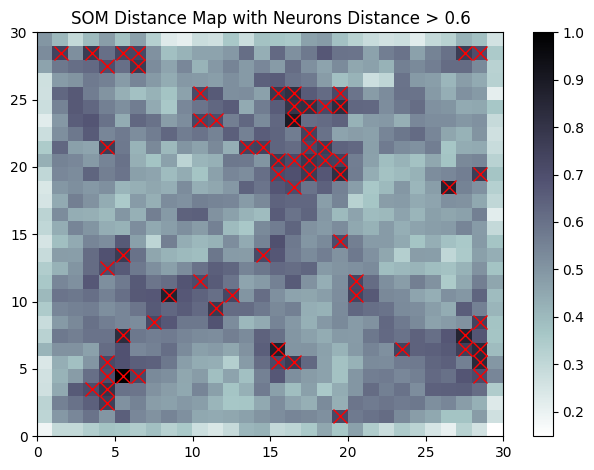

In [ ]:
data = X2_pca
som_shape = (30, 30)
sigma = 1.0
learning_rate = 0.5

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(data)

som.train_random(data, 10000)

winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_labels = np.ravel_multi_index(winner_coordinates, som_shape)

Som_clustering = pd.Series(cluster_labels, index=labels.index)

distance_map = som.distance_map()

threshold = 0.7
high_distance_neurons = np.argwhere(distance_map > threshold)
clusters_above_threshold = []
for i, label in enumerate(cluster_labels):
    bmu = som.winner(data[i])
    if any(np.array_equal(bmu, coord) for coord in high_distance_neurons):
        clusters_above_threshold.append(label)

print(f"Clusters associated with neurons having distance > {threshold}:")
print(clusters_above_threshold)

plt.pcolor(distance_map.T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Distance Map with Neurons Distance > 0.6')

for coord in high_distance_neurons:
    plt.plot(coord[0] + 0.5, coord[1] + 0.5, 'x', markersize=10, markeredgewidth=1, markeredgecolor='red')

plt.tight_layout()
plt.show()

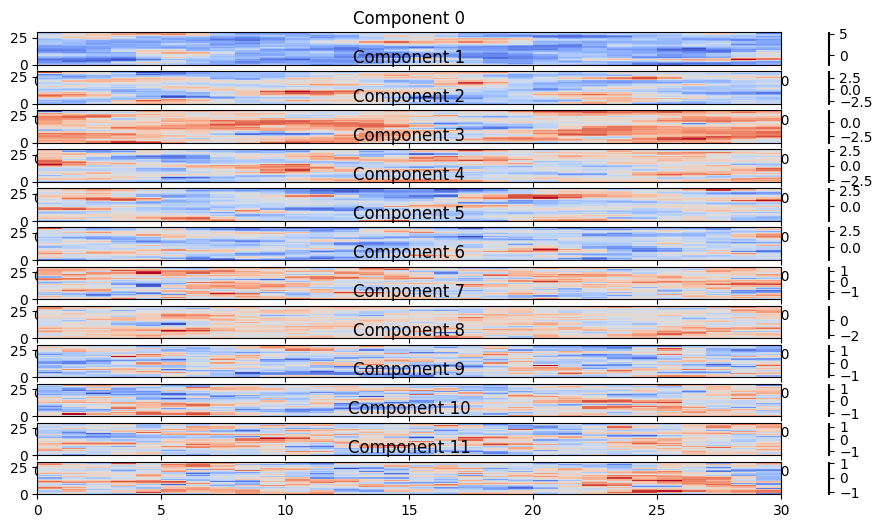

In [ ]:
plt.figure(figsize=(12, 6))

for i, c in enumerate(som.get_weights().T):
    plt.subplot(data.shape[1], 1, i+1)
    plt.pcolor(c, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Component {i}')

plt.tight_layout()
plt.show()

In [ ]:
labels['SOM_cluster'] = Som_clustering.apply(lambda x: 1 if x in clusters_above_threshold else 0)

In [ ]:
f2_scores = fbeta_score(y, labels['SOM_cluster'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y, labels['SOM_cluster'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y, labels['SOM_cluster'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['SOM_cluster'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y, labels['SOM_cluster'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['SOM_cluster'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_som = f2_scores[1]

F2 Score:
Class Good (0): 0.88
Class Bad (1): 0.16
Confusion Matrix:
 [[ 42 258]
 [ 51 649]]
Macro avg: 0.52
Weighted avg: 0.66
Rate:  0.41
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.72      0.93      0.81       700
     Bad (1)       0.45      0.14      0.21       300

    accuracy                           0.69      1000
   macro avg       0.58      0.53      0.51      1000
weighted avg       0.64      0.69      0.63      1000

Balanced Accuracy: 0.53


In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.5)
y_pred = clf.fit_predict(X2_pca)
y_pred = np.where(y_pred == -1, 1, 0)
labels['LOF'] = y_pred

In [ ]:
f2_scores = fbeta_score(y, labels['LOF'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y, labels['LOF'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y, labels['LOF'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['LOF'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y, labels['LOF'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['LOF'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_lof = f2_scores[1]

F2 Score:
Class Good (0): 0.56
Class Bad (1): 0.51
Confusion Matrix:
 [[172 128]
 [328 372]]
Macro avg: 0.53
Weighted avg: 0.55
Rate:  0.53
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.74      0.53      0.62       700
     Bad (1)       0.34      0.57      0.43       300

    accuracy                           0.54      1000
   macro avg       0.54      0.55      0.53      1000
weighted avg       0.62      0.54      0.56      1000

Balanced Accuracy: 0.55


In [ ]:
clf = OneClassSVM(nu=0.9, kernel="rbf", gamma=0.1)
clf.fit(X2)
y_pred = clf.predict(X2)
y_pred = np.where(y_pred == -1, 1, 0)
labels['OneClassSVM'] = y_pred

In [ ]:
f2_scores = fbeta_score(y, labels['OneClassSVM'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y, labels['OneClassSVM'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y, labels['OneClassSVM'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['OneClassSVM'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))


report = classification_report(y, labels['OneClassSVM'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['OneClassSVM'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_oneclass = f2_scores[1]

F2 Score:
Class Good (0): 0.12
Class Bad (1): 0.63
Confusion Matrix:
 [[266  34]
 [633  67]]
Macro avg: 0.37
Weighted avg: 0.27
Rate:  0.45
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.66      0.10      0.17       700
     Bad (1)       0.30      0.89      0.44       300

    accuracy                           0.33      1000
   macro avg       0.48      0.49      0.31      1000
weighted avg       0.55      0.33      0.25      1000

Balanced Accuracy: 0.49


In [ ]:
cov = EmpiricalCovariance().fit(X2_pca)
mean = X2_pca.mean(axis=0)

inv_cov = np.linalg.inv(cov.covariance_)
m_dist = [mahalanobis(p, mean, inv_cov) for p in X2_pca]

threshold = np.percentile(m_dist, 90)

anomalies = np.where(m_dist > threshold, 1, 0)
labels['Mahalanobis'] = anomalies

In [ ]:
f2_scores = fbeta_score(y, labels['Mahalanobis'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y, labels['Mahalanobis'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y, labels['Mahalanobis'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['Mahalanobis'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y, labels['Mahalanobis'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['Mahalanobis'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_mahalanobis = f2_scores[1]

F2 Score:
Class Good (0): 0.87
Class Bad (1): 0.17
Confusion Matrix:
 [[ 44 256]
 [ 56 644]]
Macro avg: 0.52
Weighted avg: 0.66
Rate:  0.41
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.72      0.92      0.81       700
     Bad (1)       0.44      0.15      0.22       300

    accuracy                           0.69      1000
   macro avg       0.58      0.53      0.51      1000
weighted avg       0.63      0.69      0.63      1000

Balanced Accuracy: 0.53


In [ ]:
labels['row_sum'] = labels.sum(axis=1)

In [ ]:
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis,row_sum
0,1,1,0,1,0,1,1,1,6
1,0,1,1,1,1,1,0,1,6
2,1,0,0,1,1,0,0,1,4
3,0,0,1,1,1,1,1,1,6
4,0,0,1,1,1,1,0,1,5
5,0,0,1,1,1,1,1,1,6
6,1,1,1,0,1,0,0,1,5
7,0,1,0,1,1,1,0,0,4
8,1,1,1,1,1,0,1,1,7
9,0,1,0,1,1,1,0,0,4


In [ ]:
frequency = labels['row_sum'].value_counts(normalize=True)
print(frequency)

row_sum
2    0.207
3    0.183
6    0.176
7    0.151
5    0.131
4    0.109
8    0.041
1    0.002
Name: proportion, dtype: float64


In [ ]:
y_pseudo = np.where(labels['row_sum'] >= 8, 1, 0)
labels['y_pseudo'] = y_pseudo
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis,row_sum,y_pseudo
0,1,1,0,1,0,1,1,1,6,0
1,0,1,1,1,1,1,0,1,6,0
2,1,0,0,1,1,0,0,1,4,0
3,0,0,1,1,1,1,1,1,6,0
4,0,0,1,1,1,1,0,1,5,0
5,0,0,1,1,1,1,1,1,6,0
6,1,1,1,0,1,0,0,1,5,0
7,0,1,0,1,1,1,0,0,4,0
8,1,1,1,1,1,0,1,1,7,0
9,0,1,0,1,1,1,0,0,4,0


In [ ]:
f2_scores = fbeta_score(y, labels['y_pseudo'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (1): {round(f2_scores[0], 2)}')
print(f'Class Bad (2): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y, labels['y_pseudo'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y, labels['y_pseudo'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))
rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y, labels['y_pseudo'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y, labels['y_pseudo'], target_names=['Good (1)', 'Bad (2)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y, labels['y_pseudo'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')

F2 Score:
Class Good (1): 0.89
Class Bad (2): 0.03
Macro avg: 0.46
Weighted avg: 0.63
Rate:  0.33
Confusion Matrix:
 [[  8 292]
 [ 33 667]]
Classification Report:
               precision    recall  f1-score   support

    Good (1)       0.70      0.95      0.80       700
     Bad (2)       0.20      0.03      0.05       300

    accuracy                           0.68      1000
   macro avg       0.45      0.49      0.43      1000
weighted avg       0.55      0.68      0.58      1000

Balanced Accuracy: 0.49
